In [49]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

In [50]:
ds=pd.read_csv("D:\MachineLearning\IBM\Placement_Data_Full_Class.csv")
ds.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [51]:
ds.drop("sl_no",axis=1, inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [52]:
ds.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [53]:
print(ds.shape[0])

215


In [54]:
ds['salary']=ds['salary'].fillna(ds['salary'].mean())
ds['salary']

0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

In [55]:
ds.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [56]:
ds['degree_t'].unique()    # Under Graduation(Degree type)- Field of degree education

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [57]:
ds['specialisation'].unique()    # Post Graduation(MBA)- Specialization

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [58]:
# Manual Encoding
ds['gender']=ds['gender'].replace({'M':1,'F':0})
ds.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [59]:
ds.specialisation.unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

Plot of every column :

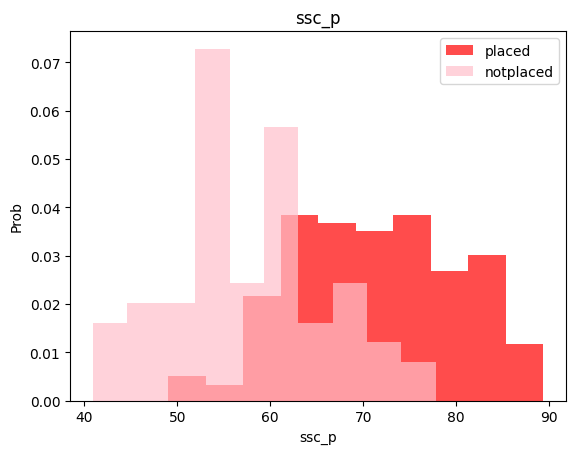

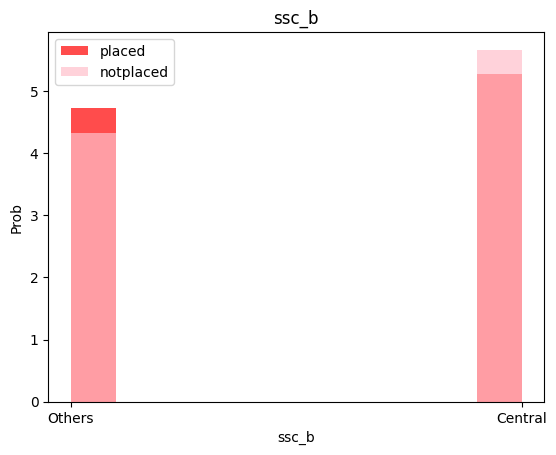

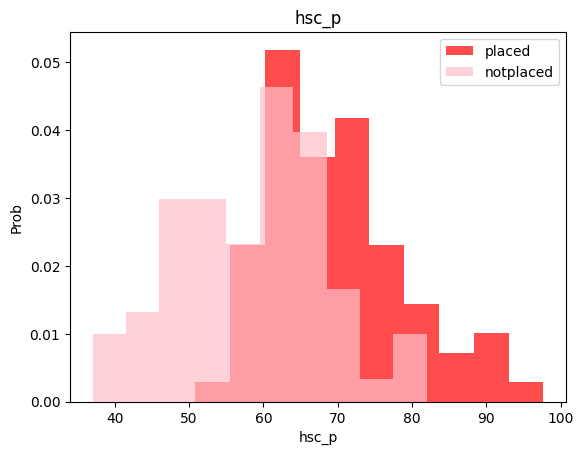

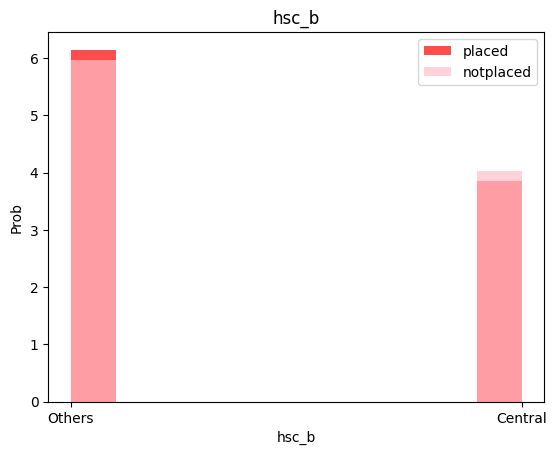

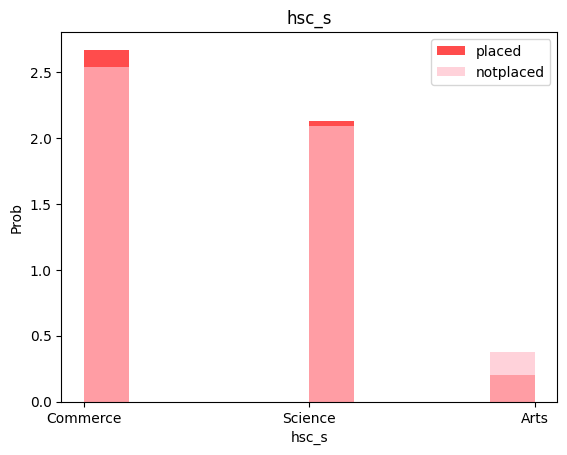

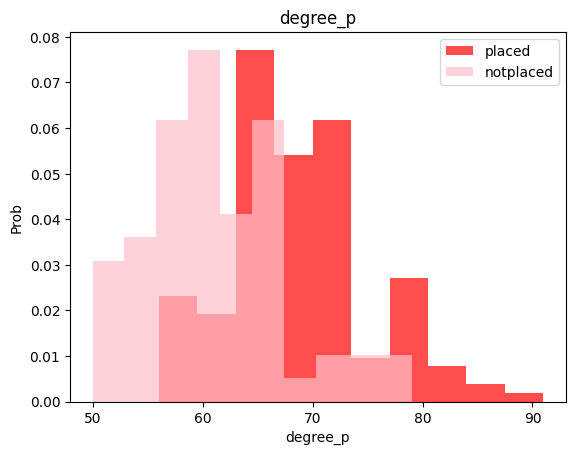

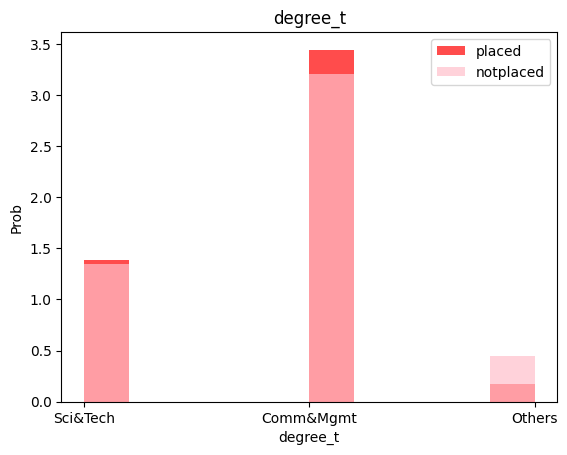

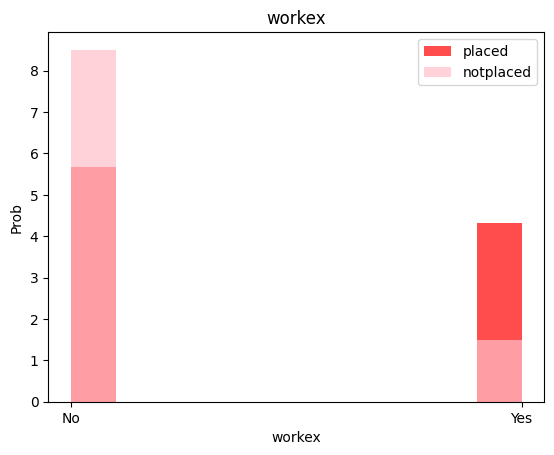

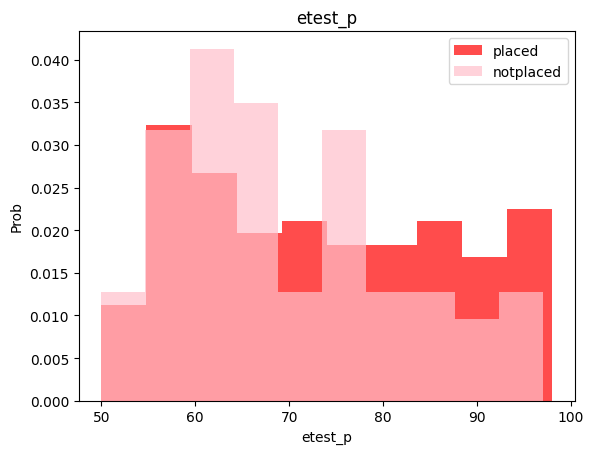

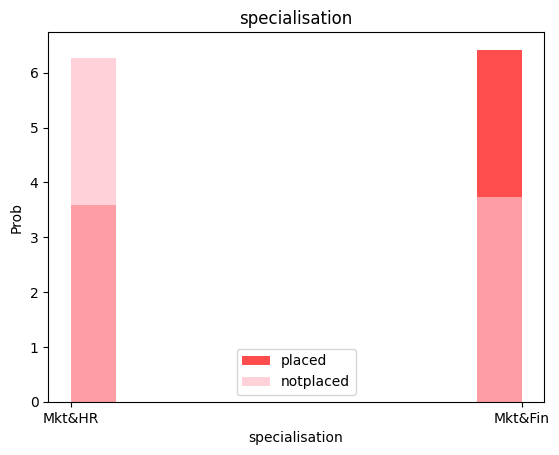

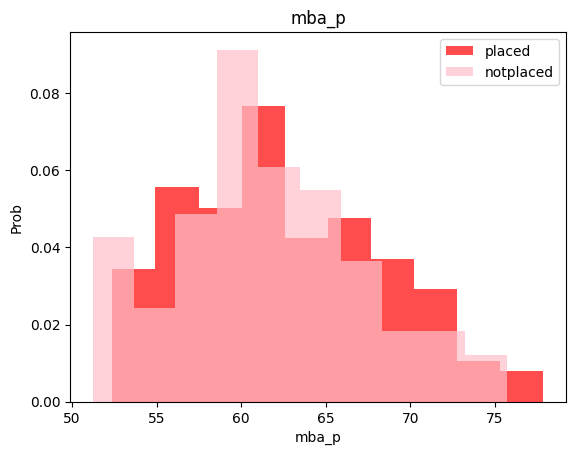

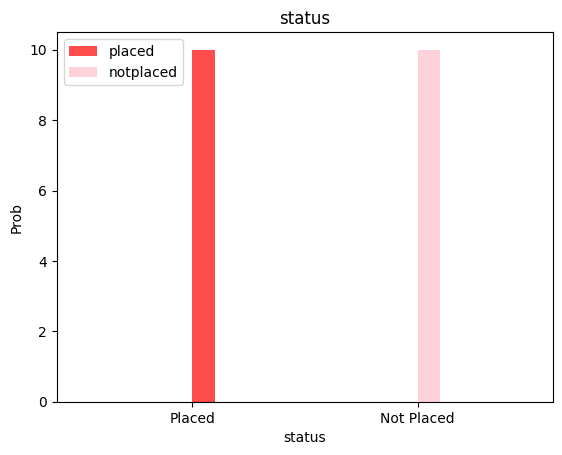

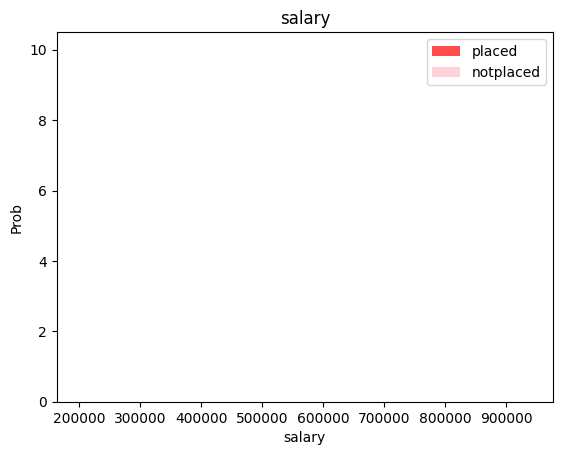

In [60]:
for x in ds.columns[1:]:
    plt.hist(ds[ds["status"]=="Placed"][x], color='red',label='placed',alpha=0.7,density=True)
    plt.hist(ds[ds["status"]=="Not Placed"][x], color='pink',label='notplaced',alpha=0.7,density=True)
    plt.title(x)
    plt.ylabel("Prob")
    plt.xlabel(x)
    plt.legend()
    plt.show()
    print()

# **From the above plot we got to know that salary column is not related to status whether the student is placed or not so we'll not include it in the feature for our model.**

# **Label Encoding :**

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=['ssc_b','hsc_s','hsc_b','degree_t','workex','specialisation','status']
for i in l:
  ds[i]=le.fit_transform(ds[i])
ds.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


# **Heatmap**

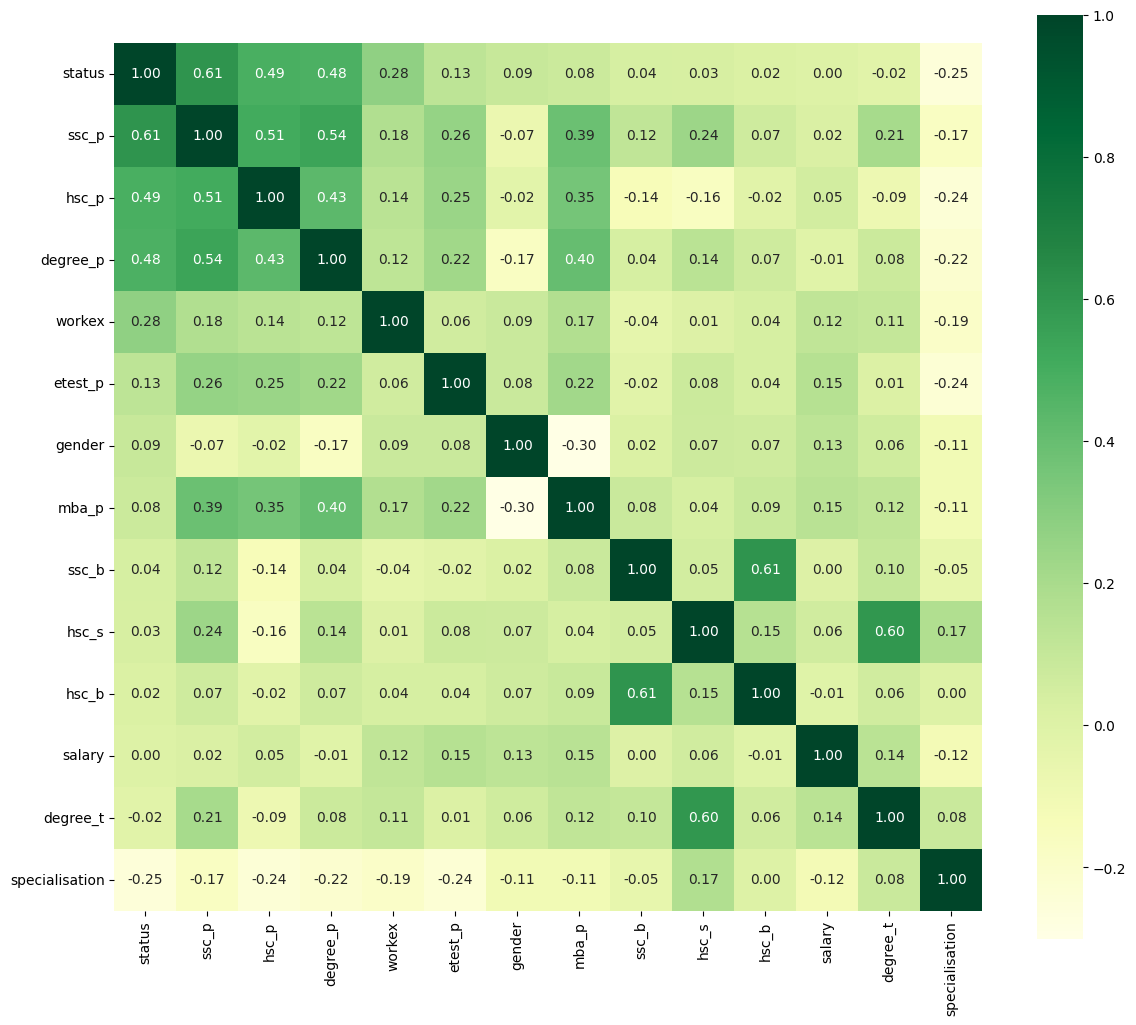

In [62]:
corrmat = ds.corr()   # corr() function calculates the Pearson correlation coefficients between pairs of features
k = 14  # sets the number of features to include in the heatmap.
cols = corrmat.nlargest(k, 'status')['status'].index   # selects the top k features with the highest correlation values with the target variable ('status')
cm = np.corrcoef(ds[cols].values.T)  # np.corrcoef() calculates the correlation matrix for the transposed values of the selected features.
plt.figure(figsize=(14,12))    # specified size to display the heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='YlGn', linecolor='white')

In [63]:
high_corr_features=corrmat.index[abs(corrmat['status'])>0.20]
print('Highly Correlated Features:', high_corr_features, '\n')
print('No. of Highly Correlated Features:', len(high_corr_features))

Highly Correlated Features: Index(['ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'status'], dtype='object') 

No. of Highly Correlated Features: 6


## **HOW MANY STUDENTS PLACED ??**

Number of students placed: 148
Number of students not placed: 67



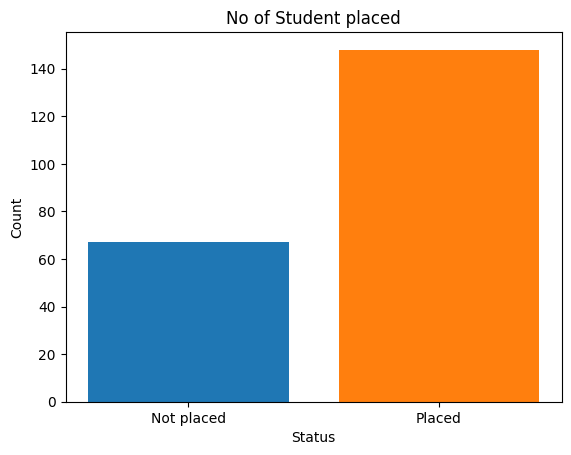

<Figure size 640x480 with 0 Axes>

In [64]:
print("Number of students placed: "+ str(len(ds[ds["status"]==1])))
print("Number of students not placed: "+ str(len(ds[ds["status"]==0]))+ "\n")


plt.bar([0],height=len(ds[ds["status"]==0]))    # [0] means x-coord=0
plt.bar([1],height=len(ds[ds["status"]==1]))    # [1] means x-coord=1

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))   # to label the bars
plt.title("No of Student placed")
plt.show()
plt.savefig("fig1.png")

# **Average percentage of all education qualification :**

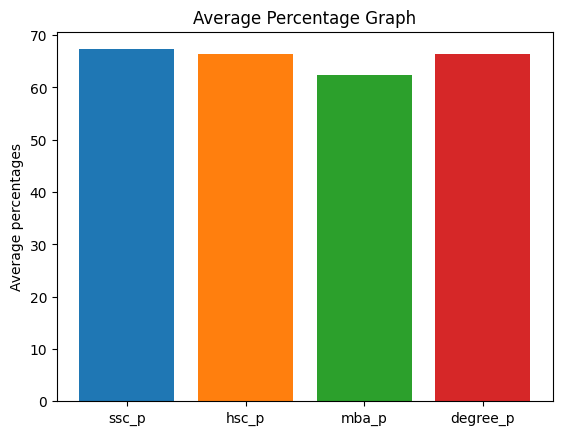

In [65]:
plt.bar([0],height=[ds['ssc_p'].mean()])
plt.bar([1],height=[ds['hsc_p'].mean()])
plt.bar([2],height=[ds['mba_p'].mean()])
plt.bar([3],height=[ds['degree_p'].mean()])

plt.ylabel("Average percentages")

plt.xticks(np.arange(4), ('ssc_p', 'hsc_p','mba_p','degree_p'))   # to label the bars
plt.title("Average Percentage Graph")
plt.show()

## Q1) Does percentage matters for one to get placed?

In [66]:
#show the relation between diffrent qualification placement status usinng correlation.

# Calculate correlation between features and placement status
correlation_matrix = ds.corr()
placement_correlation = correlation_matrix.loc['status', ['ssc_p', 'hsc_p', 'mba_p', 'degree_p', 'etest_p']]

# Calculate the correlation percentages
correlation_percentages = (placement_correlation * 100).round(1)

# Print the correlation percentages
for feature, percentage in correlation_percentages.items():
    print(f"{feature} to placement : {percentage} %")

ssc_p to placement : 60.8 %
hsc_p to placement : 49.1 %
mba_p to placement : 7.7 %
degree_p to placement : 48.0 %
etest_p to placement : 12.8 %


In [67]:
df_grade = ds.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()
df_grade.head()

,status,hsc_p,degree_p,mba_p
0,0,58.395522,61.134179,61.612836
1,1,69.926554,68.740541,62.579392


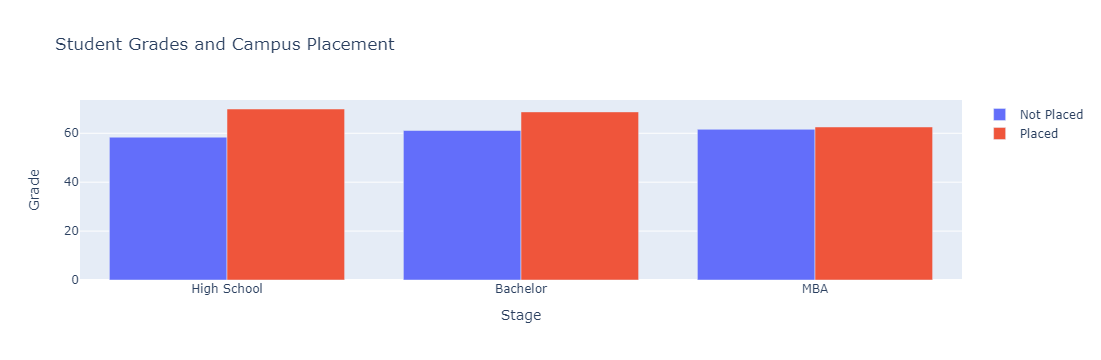

In [68]:
#Student Grades and Campus Placement
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline
trace1 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==0].drop('status', axis=1).values[0],
    name = 'Not Placed'
)

trace2 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==1].drop('status', axis=1).values[0],
    name = 'Placed'
)

data = [trace1, trace2]

layout = go.Layout(
    yaxis = dict(title = 'Grade'),
    xaxis = dict(title = 'Stage'),
    title = 'Student Grades and Campus Placement')
fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_html("plot.html")


From the Above graph we can say that percentage matters and ssc_p feature data factor influenced a candidate in getting placed.
when we see the correlation between features and placement then it shows that the ssc_p data is more correlated to placement.
We know that it is some tricky to say that senior secondary(ssc_p)percentage is not so much help in real world placement.
But After seeing the correlation between features and placement the we definitely say the percentage matters for getting placed.

In [69]:
total_placed=ds[(ds["status"]==1)]
obj1=total_placed.groupby("gender").status.count()
obj1

gender
0     48
1    100
Name: status, dtype: int64

**Pie Chart of 'Status':**

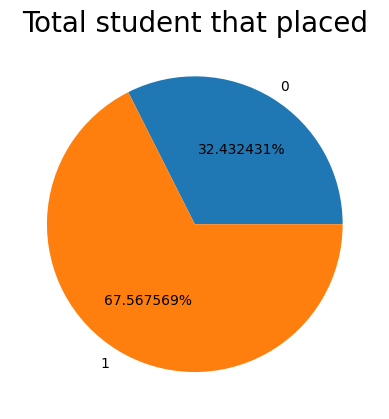

In [70]:
plt.pie(obj1.values,labels=obj1.index,autopct="%2f%%")
plt.title("Total student that placed",fontsize=20)
plt.savefig("fig4.png")

## Q2) What is the percentage of female or male getting placement?

In [71]:
def count_genderwise_status(gender=0,status=0):
    i=0
    for j in range(len(ds)-1):
        j=j+1
        if ds['gender'][j]==gender and ds['status'][j]==status:
            i+=1

    if gender==0 and status==0:
        print("Total female who don't get placement is: "+str(i))
    if gender==0 and status==1:
        print("Total female who get placement is: "+str(i))
    if gender==1 and status==0:
        print("Total male who don't get placement is: "+str(i))
    if gender==1 and status==1:
        print("Total male who get placement is: "+str(i))


    return i

In [72]:
not_placed_female=count_genderwise_status(0,0)
placed_female=count_genderwise_status(0,1)
not_placed_male=count_genderwise_status(1,0)
placed_male=count_genderwise_status(1,1)

Total female who don't get placement is: 28
Total female who get placement is: 48
Total male who don't get placement is: 39
Total male who get placement is: 99


In [73]:
print("Not place female "+str(not_placed_female))
print("place female     "+str(placed_female))
print("Total female     "+str(len(ds[ds["gender"]==0])))
print("\n")
print("Not placed male  "+str(not_placed_male))
print("Placed male      "+str(placed_male))
print("Total male       "+str(len(ds[ds["gender"]==1])))
print("\n")
print("Total Not placed "+str(len(ds[ds["status"]==0])))
print("Total placed     "+str(len(ds[ds["status"]==1])))
print("\n")
print("Total student    "+str(len(ds)))


Not place female 28
place female     48
Total female     76


Not placed male  39
Placed male      99
Total male       139


Total Not placed 67
Total placed     148


Total student    215


In [74]:
#calculate percentage
print((placed_female/len(ds))*100)
print((placed_male/len(ds))*100)
print(((not_placed_female+not_placed_male)/len(ds))*100)

22.325581395348838
46.04651162790698
31.16279069767442


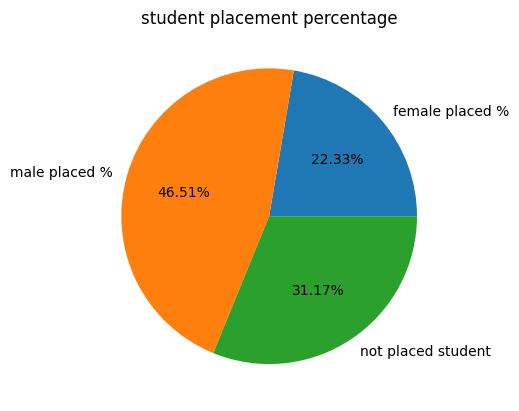

<Figure size 640x480 with 0 Axes>

In [75]:
#plot pie chart of placeement
plt.pie([22.33,46.51,31.17],
        labels=["female placed %","male placed %",'not placed student'],
        autopct='%1.2f%%')
plt.title('student placement percentage')
plt.show()
plt.savefig("fig5.png")

From the above pie chart we can interpret that 46.51% male are palced whereas 22.33% of female are placed and 31.17% of the total are not placed whether they are male or female

# Q3) Which degree specialization is much demanded by corporate?

specialisation in Mkt&HR 95
specialisation in Mkt&Fin 120


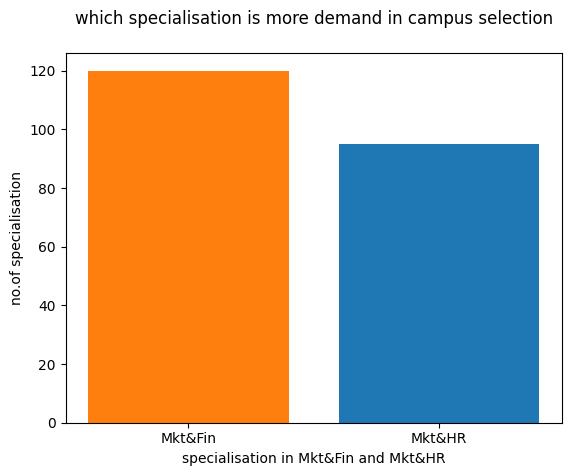

<Figure size 640x480 with 0 Axes>

In [76]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(ds[ds["specialisation"]==1]))
plt.bar([0],height=len(ds[ds["specialisation"]==0]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&HR "+ str(len(ds[ds["specialisation"]==1])))
print("specialisation in Mkt&Fin "+ str(len(ds[ds["specialisation"]==0])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()
plt.savefig("fig6.png")

In [77]:
# sns.set_theme(style="ticks")
# sns.pairplot(ds, hue="status")
# plt.savefig("pairplot.png")

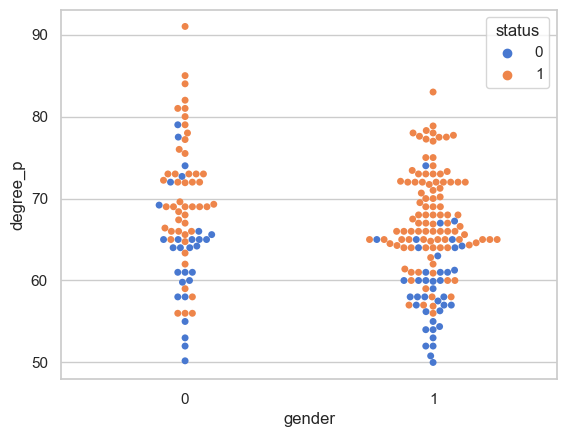

In [78]:
sns.set_theme(style="whitegrid", palette="muted")
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=ds, x="gender", y="degree_p", hue="status")

# **We can say that stream and board of secondary and higher secondary doesn't matter in getting placement. Therefore, removing such columns:**

## **Also from the plots, we got to know that salary doesn't matter for getting placed , So we'll remove salary column also**

In [79]:
ds.drop(["hsc_b","hsc_s","degree_t","ssc_b","salary"],axis=1, inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   degree_p        215 non-null    float64
 4   workex          215 non-null    int32  
 5   etest_p         215 non-null    float64
 6   specialisation  215 non-null    int32  
 7   mba_p           215 non-null    float64
 8   status          215 non-null    int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 12.7 KB


In [80]:
x=ds.iloc[:,:8]
y=ds.iloc[:,-1]
x.info()
y.info()
x.head(15)
# y.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   degree_p        215 non-null    float64
 4   workex          215 non-null    int32  
 5   etest_p         215 non-null    float64
 6   specialisation  215 non-null    int32  
 7   mba_p           215 non-null    float64
dtypes: float64(5), int32(2), int64(1)
memory usage: 11.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: status
Non-Null Count  Dtype
--------------  -----
215 non-null    int32
dtypes: int32(1)
memory usage: 992.0 bytes


,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,58.00,0,55.00,1,58.80
1,1,79.33,78.33,77.48,1,86.50,0,66.28
2,1,65.00,68.00,64.00,0,75.00,0,57.80
3,1,56.00,52.00,52.00,0,66.00,1,59.43
4,1,85.80,73.60,73.30,0,96.80,0,55.50
5,1,55.00,49.80,67.25,1,55.00,0,51.58
6,0,46.00,49.20,79.00,0,74.28,0,53.29
7,1,82.00,64.00,66.00,1,67.00,0,62.14
8,1,73.00,79.00,72.00,0,91.34,0,61.29
9,1,58.00,70.00,61.00,0,54.00,0,52.21


In [81]:
# Feature scaling (MinMax Scaler or Standard Scaler)
p=Pipeline([('min_max',MinMaxScaler())
            ])
p

# Using MinMax Scaler as it's giving better results in the model after checking performance one by one

Pipeline(steps=[('min_max', MinMaxScaler())])

In [89]:
p.fit(x)
x=p.transform(x)
x=pd.DataFrame(x)
x.iloc[:5,:]

,0,1,2,3,4,5,6,7
0,1.0,0.538240,0.889621,0.195122,0.0,0.104167,1.0,0.284483
1,1.0,0.792414,0.680890,0.670244,1.0,0.760417,0.0,0.564843
2,1.0,0.497011,0.510708,0.341463,0.0,0.520833,0.0,0.247001
3,1.0,0.311482,0.247117,0.048780,0.0,0.333333,1.0,0.308096
4,1.0,0.925788,0.602965,0.568293,0.0,0.975000,0.0,0.160795


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=32)

In [91]:
m1=KNeighborsClassifier()
m1.fit(x_train,y_train)
pred1=m1.predict(x_test)
# r2_score(y_test,pred1)
print(classification_report(y_test,pred1))


              precision    recall  f1-score   support

           0       0.58      0.42      0.49        26
           1       0.78      0.87      0.82        60

    accuracy                           0.73        86
   macro avg       0.68      0.64      0.65        86
weighted avg       0.72      0.73      0.72        86



In [92]:
m2=LogisticRegression()
m2.fit(x_train,y_train)
pred2=m2.predict(x_test)
# r2_score(y_test,pred2)
print(classification_report(y_test,pred2))



input_data = ['-1.35', '0.33', '0.519', '-0.104', '-0.72', '-0.30', '1.12', '1.60']
data=['1.0','0.538240','0.889621','0.195122','0.0','0.104167','1.0','0.284483']
# Convert input_data to a 2D array with numerical values
input_array = np.array(input_data, dtype=float).reshape(1, -1)
array=np.array(data, dtype=float).reshape(1, -1)
print(m2.predict(input_array))
print(m2.predict(array))



              precision    recall  f1-score   support

           0       0.95      0.69      0.80        26
           1       0.88      0.98      0.93        60

    accuracy                           0.90        86
   macro avg       0.91      0.84      0.86        86
weighted avg       0.90      0.90      0.89        86

[0]
[1]


In [93]:
m3=RandomForestClassifier(n_estimators=100,random_state=1)
m3.fit(x_train,y_train)
pred3=m3.predict(x_test)
# r2_score(y_test,pred3)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        26
           1       0.86      0.90      0.88        60

    accuracy                           0.83        86
   macro avg       0.80      0.78      0.79        86
weighted avg       0.82      0.83      0.82        86



In [94]:
m4=DecisionTreeClassifier()
m4.fit(x_train,y_train)
pred4=m4.predict(x_test)
# r2_score(y_test,pred4)
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51        26
           1       0.78      0.90      0.84        60

    accuracy                           0.76        86
   macro avg       0.71      0.66      0.67        86
weighted avg       0.74      0.76      0.74        86



In [95]:
# Taking 'm2' as our model and 'p' is our preprocessing pipeline
model_with_preprocessing = {'model': m2, 'preprocessing': p}

# Save the combined model and preprocessing
with open('combined_model.pkl', 'wb') as f:
    pickle.dump(model_with_preprocessing, f)
